# 1. Preprocess

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from gensim.models import word2vec
from gensim.utils import tokenize

## 1.1 Load Data

(1) Load 'taxonomy.csv' file

In [2]:
data_taxonomy = pd.read_csv('taxonomy.csv')
data_taxonomy

,ID,kingdom,phylum,class,order,family,genus,species,sequence
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],Unassigned,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,g__Rubricoccus,Unassigned,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...
...,...,...,...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,Unassigned,Unassigned,Unassigned,Unassigned,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,o__Nitrosocaldales,f__Nitrosocaldaceae,g__Candidatus Nitrosocaldus,Unassigned,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...


(2) Load '6mer-matrix.csv' file

In [3]:
data_6mer = pd.read_csv('6mer-matrix.csv')
data_6mer

,AAAGGG,AAATCC,AACTGC,AACTGT,AAGCGT,AAGGGT,AAGTCA,AATCAC,AATCCC,AATTCG,...,CCACTC,TTACAC,ACACAC,CTCCAC,CACCAC,CACCAT,AGATCC,TGACCC,CACTAT,ACACCC
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27405,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27406,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27407,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27408,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2 Preprocess 'data_taxonomy' with K-mers

(1) K-mers function

In [4]:
def k_mers_preprocess(squence, k=6):
    length = len(squence)
    kmers_result = ''
    
    for i in range(length-k+1):
        kmers_result = kmers_result+' '+squence[i:i+k]
    
    kmers_result = kmers_result.strip()  # Remove the space at the begin and end of the string
    
    return kmers_result

(2) Preprocess 'data_taxonomy' with k-mers

In [5]:
# Get the number of sequence
data_size = data_taxonomy.shape[0]
# The k value of k-mers
k = 6
# Store the results after k-mers
sequence_kmers = list()

for i in range(data_size):
    sequence_kmers.append(k_mers_preprocess(data_taxonomy['sequence'][i], k))

#sequence_kmers

In [6]:
# Add the results after k-mers to data_taxonomy
data_taxonomy['sequence_kmers'] = sequence_kmers
data_taxonomy

,ID,kingdom,phylum,class,order,family,genus,species,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],Unassigned,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,Unassigned,Unassigned,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],o__[Rhodothermales],f__Rhodothermaceae,g__Rubricoccus,Unassigned,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,Unassigned,Unassigned,Unassigned,Unassigned,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...,AACCAG ACCAGC CCAGCT CAGCTC AGCTCC GCTCCT CTCC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,Unassigned,Unassigned,Unassigned,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...,CACGTA ACGTAG CGTAGG GTAGGA TAGGAG AGGAGG GGAG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,o__Nitrosocaldales,f__Nitrosocaldaceae,g__Candidatus Nitrosocaldus,Unassigned,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [7]:
data_taxonomy.to_csv('taxonomy_new.csv')

## 1.3 Feature Engineering

(1) Select three ranks: 'kingdom', 'phylum', 'class'

In [8]:
data_taxonomy = data_taxonomy.drop(columns = ['order','family','genus','species'])
data_taxonomy

,ID,kingdom,phylum,class,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...,AACCAG ACCAGC CCAGCT CAGCTC AGCTCC GCTCCT CTCC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...,CACGTA ACGTAG CGTAGG GTAGGA TAGGAG AGGAGG GGAG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


(2) Observe the classifications of three ranks, respectively.

In [9]:
print("Kingdom: {}".format(np.unique(data_taxonomy['kingdom'])))
print("Phylum: {}".format(np.unique(data_taxonomy['phylum'])))
print("Class: {}".format(np.unique(data_taxonomy['class'])))
# print("Order: {}".format(np.unique(data_taxonomy['order'])))
# print("Family: {}".format(np.unique(data_taxonomy['family'])))
# print("Genus: {}".format(np.unique(data_taxonomy['genus'])))
# print("Species: {}".format(np.unique(data_taxonomy['species'])))

Kingdom: ['Unassigned' 'k__Archaea' 'k__Bacteria']
Phylum: ['Unassigned' 'p__AC1' 'p__AD3' 'p__Acidobacteria' 'p__Actinobacteria'
 'p__AncK6' 'p__Aquificae' 'p__Armatimonadetes' 'p__BHI80-139' 'p__BRC1'
 'p__Bacteroidetes' 'p__CD12' 'p__Caldithrix' 'p__Chlamydiae'
 'p__Chlorobi' 'p__Chloroflexi' 'p__Crenarchaeota' 'p__Cyanobacteria'
 'p__Elusimicrobia' 'p__Euryarchaeota' 'p__FBP' 'p__FCPU426'
 'p__Fibrobacteres' 'p__Firmicutes' 'p__Fusobacteria' 'p__GAL15' 'p__GN02'
 'p__GN04' 'p__GOUTA4' 'p__Gemmatimonadetes' 'p__H-178' 'p__Hyd24-12'
 'p__KSB3' 'p__LCP-89' 'p__Lentisphaerae' 'p__MVP-21' 'p__MVS-104'
 'p__NC10' 'p__NKB19' 'p__NPL-UPA2' 'p__Nitrospirae' 'p__OC31' 'p__OD1'
 'p__OP1' 'p__OP11' 'p__OP3' 'p__OP8' 'p__OP9' 'p__PAUC34f'
 'p__Planctomycetes' 'p__Poribacteria' 'p__Proteobacteria' 'p__SAR406'
 'p__SBR1093' 'p__SC4' 'p__SR1' 'p__Spirochaetes' 'p__Synergistetes'
 'p__TM6' 'p__TM7' 'p__Tenericutes' 'p__VHS-B3-43' 'p__Verrucomicrobia'
 'p__WPS-2' 'p__WS1' 'p__WS2' 'p__WS3' 'p__WS5' 

(3) Count the number of each category

In [10]:
counts = data_taxonomy.groupby(['kingdom','phylum','class'])['sequence'].count().reset_index(name = 'Count')
counts

,kingdom,phylum,class,Count
0,Unassigned,Unassigned,Unassigned,15
1,k__Archaea,Unassigned,Unassigned,57
2,k__Archaea,p__Crenarchaeota,Unassigned,1
3,k__Archaea,p__Crenarchaeota,c__AAG,2
4,k__Archaea,p__Crenarchaeota,c__MBGA,3
...,...,...,...,...
241,k__Bacteria,p__WWE1,c__[Cloacamonae],4
242,k__Bacteria,p__ZB3,Unassigned,4
243,k__Bacteria,p__ZB3,c__BS119,9
244,k__Bacteria,p__[Caldithrix],c__KSB1,11


In [13]:
counts_k = data_taxonomy.groupby(['kingdom'])['sequence'].count().reset_index(name = 'Count')
counts_k['Percentage'] = counts_k['Count']/np.sum(counts_k['Count'],axis=0)
counts_k['Percentage'] = counts_k['Percentage'].apply(lambda x: format(x,'.3%'))
counts_k

,kingdom,Count,Percentage
0,Unassigned,15,0.055%
1,k__Archaea,694,2.532%
2,k__Bacteria,26701,97.413%


In [14]:
counts_p = data_taxonomy.groupby(['phylum'])['sequence'].count().reset_index(name = 'Count')
counts_p['Percentage'] = counts_p['Count']/np.sum(counts_p['Count'],axis=0)
counts_p['Percentage'] = counts_p['Percentage'].apply(lambda x: format(x,'.3%'))
counts_p

,phylum,Count,Percentage
0,Unassigned,781,2.849%
1,p__AC1,5,0.018%
2,p__AD3,12,0.044%
3,p__Acidobacteria,1658,6.049%
4,p__Actinobacteria,1695,6.184%
...,...,...,...
68,p__WWE1,6,0.022%
69,p__ZB3,13,0.047%
70,p__[Caldithrix],11,0.040%
71,p__[Parvarchaeota],399,1.456%


In [15]:
counts_c = data_taxonomy.groupby(['class'])['sequence'].count().reset_index(name = 'Count')
counts_c['Percentage'] = counts_c['Count']/np.sum(counts_c['Count'],axis=0)
counts_c['Percentage'] = counts_c['Percentage'].apply(lambda x: format(x,'.3%'))
counts_c

,class,Count,Percentage
0,Unassigned,1719,6.271%
1,c__028H05-P-BN-P5,9,0.033%
2,c__0319-6E2,21,0.077%
3,c__12-24,5,0.018%
4,c__3BR-5F,3,0.011%
...,...,...,...
190,c__[Spartobacteria],297,1.084%
191,c__[Thermobacula],1,0.004%
192,c__iii1-8,61,0.223%
193,c__koll11,110,0.401%


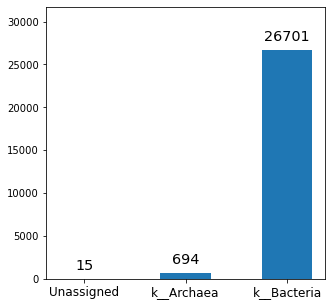

In [19]:
plt.figure(figsize=(5,5))
plt.ylim(0,np.max(counts_k['Count'])+5000)
plt.bar(counts_k['kingdom'],counts_k['Count'], width = 0.5)
# colours = ['red', 'blue', 'orange']
# plt.bar(x=counts['kingdom'], height=counts['Count'], color=colours)
plt.xticks(counts_k['kingdom'],counts_k['kingdom'], fontproperties = 'Times New Roman', size = 12)
for i in range(len(counts_k['kingdom'])):
    plt.annotate("%s" % round(counts_k['Count'][i],2), xy=(counts_k['kingdom'][i],counts_k['Count'][i]), 
                 xytext=(counts_k['kingdom'][i],counts_k['Count'][i]+1500),ha='center',va='center',fontsize='x-large')

plt.show()

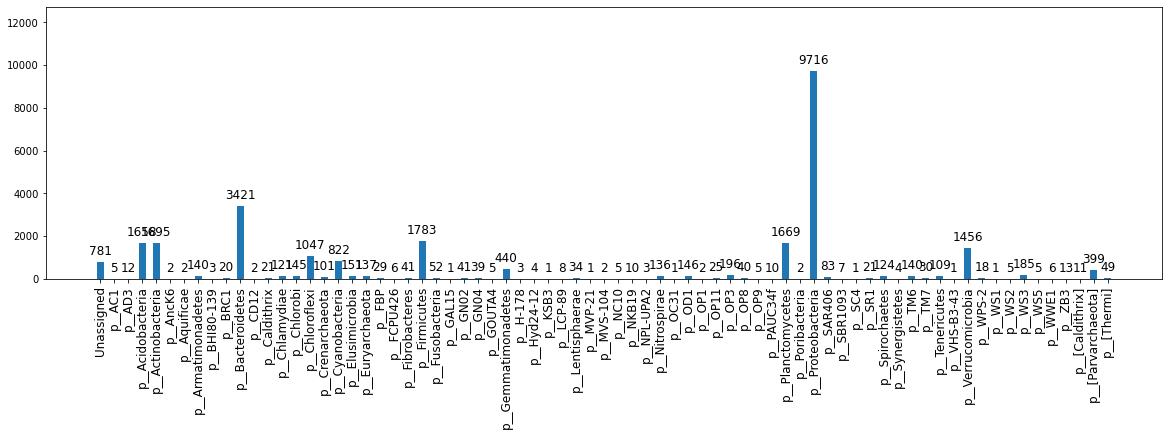

In [20]:
plt.figure(figsize=(20,5))
plt.ylim(0,np.max(counts_p['Count'])+3000)
plt.bar(counts_p['phylum'],counts_p['Count'], width = 0.5)
plt.xticks(counts_p['phylum'],counts_p['phylum'], fontproperties = 'Times New Roman', size = 12, rotation = 'vertical')
for i in range(len(counts_p['phylum'])):
    plt.annotate("%s" % round(counts_p['Count'][i],2), xy=(counts_p['phylum'][i],counts_p['Count'][i]), 
                 xytext=(counts_p['phylum'][i],counts_p['Count'][i]+500),ha='center',va='center',fontsize='large')

plt.show()

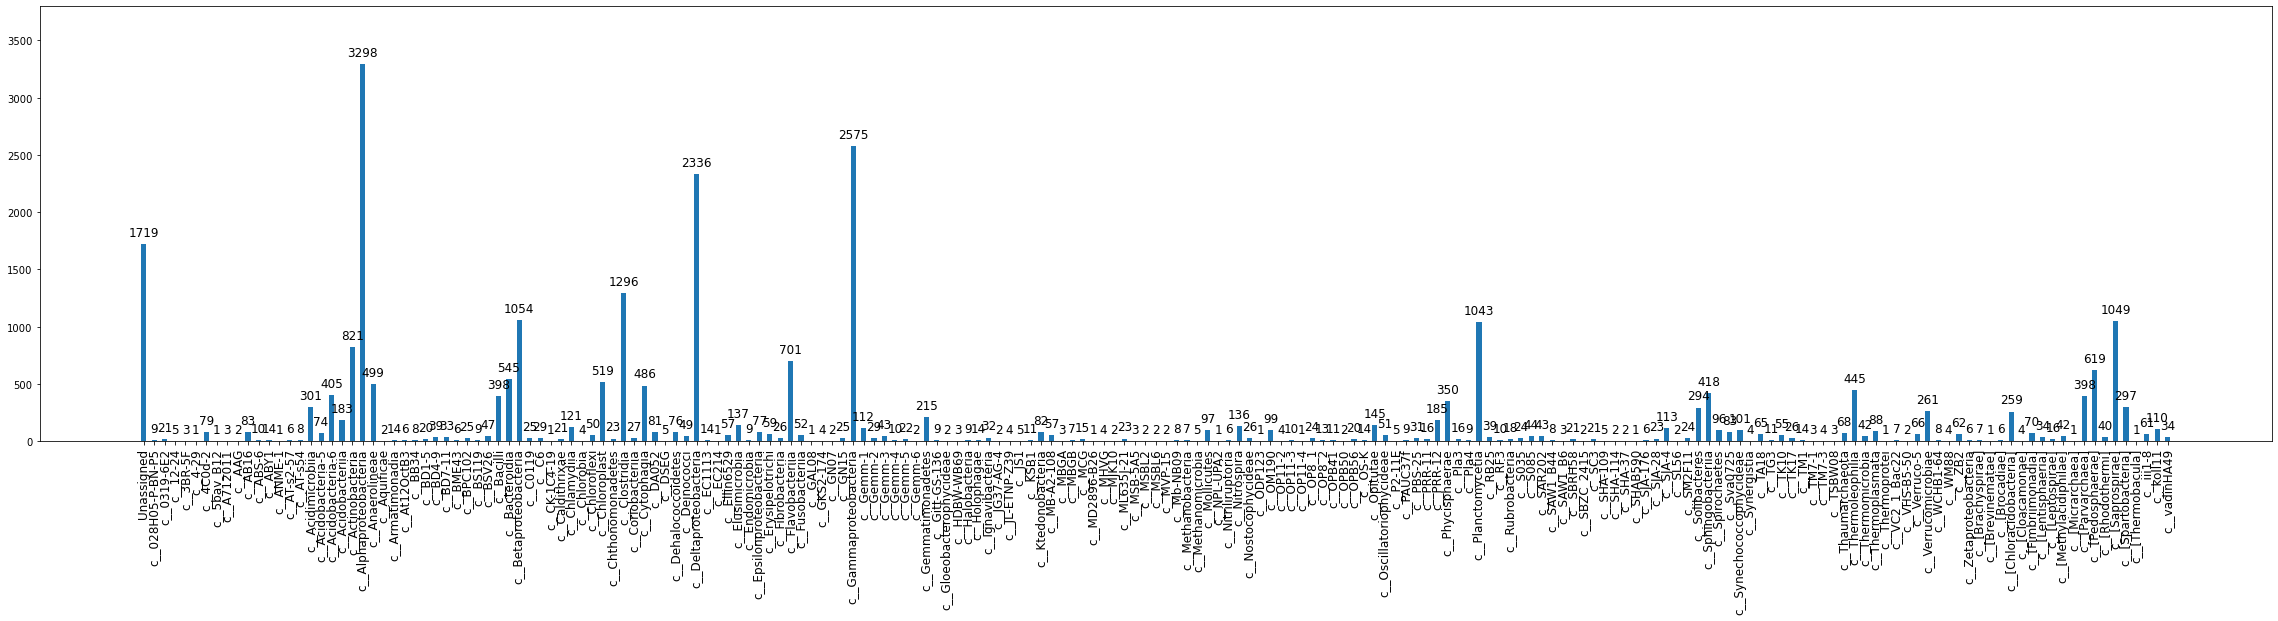

In [21]:
plt.figure(figsize=(40,8))
plt.ylim(0,np.max(counts_c['Count'])+500)
plt.bar(counts_c['class'],counts_c['Count'], width = 0.5)
plt.xticks(counts_c['class'],counts_c['class'], fontproperties = 'Times New Roman', size = 12, rotation = 'vertical')
for i in range(len(counts_c['class'])):
    plt.annotate("%s" % round(counts_c['Count'][i],2), xy=(counts_c['class'][i],counts_c['Count'][i]), 
                 xytext=(counts_c['class'][i],counts_c['Count'][i]+100),ha='center',va='center',fontsize='large')

plt.show()

(4) Remove the data whose count is less than 4.

In [22]:
counts = counts[counts['Count']>9]

class_c = list(counts['class']) # Save the 'class_n' attribute whose count is greater than 1.

data_taxonomy = data_taxonomy[data_taxonomy['class'].isin(class_c)]
data_taxonomy

,ID,kingdom,phylum,class,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27406,ID-76670,k__Archaea,p__Crenarchaeota,Unassigned,AACCAGCTCCTCGAGTAGTCGGGAGGATTACTGGGTCTAAAGCGTC...,AACCAG ACCAGC CCAGCT CAGCTC AGCTCC GCTCCT CTCC...
27407,ID-63560,k__Bacteria,p__VHS-B3-43,Unassigned,CACGTAGGAGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTG...,CACGTA ACGTAG CGTAGG GTAGGA TAGGAG AGGAGG GGAG...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [23]:
data_taxonomy.to_csv('2_taxonomy_preprocessed.csv')

(5) Remove the 'Unassigned' data

In [24]:
data_taxonomy = data_taxonomy[data_taxonomy['kingdom'] != 'Unassigned']
data_taxonomy = data_taxonomy[data_taxonomy['phylum'] != 'Unassigned']
data_taxonomy = data_taxonomy[data_taxonomy['class'] != 'Unassigned']
data_taxonomy

,ID,kingdom,phylum,class,sequence,sequence_kmers
0,ID-10213,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,p__Bacteroidetes,c__[Rhodothermi],TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27400,ID-50131,k__Bacteria,p__Spirochaetes,c__Spirochaetes,TACGTAAGGAGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCG...,TACGTA ACGTAA CGTAAG GTAAGG TAAGGA AAGGAG AGGA...
27402,ID-53233,k__Bacteria,p__Chloroflexi,c__Thermomicrobia,TACGTAGGGTCCGAGCGTTGTCCGGAGTGACTGGGCGTAAAGCGCG...,TACGTA ACGTAG CGTAGG GTAGGG TAGGGT AGGGTC GGGT...
27405,ID-59236,k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27408,ID-75469,k__Archaea,p__Crenarchaeota,c__Thaumarchaeota,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [25]:
print("Kingdom: {}".format(np.unique(data_taxonomy['kingdom'])))
print("Phylum: {}".format(np.unique(data_taxonomy['phylum'])))
print("Class: {}".format(np.unique(data_taxonomy['class'])))

Kingdom: ['k__Archaea' 'k__Bacteria']
Phylum: ['p__AD3' 'p__Acidobacteria' 'p__Actinobacteria' 'p__Armatimonadetes'
 'p__BRC1' 'p__Bacteroidetes' 'p__Caldithrix' 'p__Chlamydiae'
 'p__Chlorobi' 'p__Chloroflexi' 'p__Crenarchaeota' 'p__Cyanobacteria'
 'p__Elusimicrobia' 'p__Euryarchaeota' 'p__Fibrobacteres' 'p__Firmicutes'
 'p__Fusobacteria' 'p__GN02' 'p__GN04' 'p__Gemmatimonadetes'
 'p__Lentisphaerae' 'p__Nitrospirae' 'p__OD1' 'p__OP11' 'p__OP3' 'p__OP8'
 'p__Planctomycetes' 'p__Proteobacteria' 'p__SAR406' 'p__Spirochaetes'
 'p__TM6' 'p__TM7' 'p__Tenericutes' 'p__Verrucomicrobia' 'p__WS3'
 'p__[Caldithrix]' 'p__[Parvarchaeota]' 'p__[Thermi]']
Class: ['c__0319-6E2' 'c__4C0d-2' 'c__AB16' 'c__ABS-6' 'c__ABY1'
 'c__Acidimicrobiia' 'c__Acidobacteria-5' 'c__Acidobacteria-6'
 'c__Acidobacteriia' 'c__Actinobacteria' 'c__Alphaproteobacteria'
 'c__Anaerolineae' 'c__Armatimonadia' 'c__BD1-5' 'c__BD4-9' 'c__BD7-11'
 'c__BPC102' 'c__BSV26' 'c__Bacilli' 'c__Bacteroidia'
 'c__Betaproteobacteria' 'c__C0

(6) Change the categoric attributes into numeric attributes

In [26]:
kingdoms = np.unique(data_taxonomy['kingdom'])
phylums = np.unique(data_taxonomy['phylum'])
classes = np.unique(data_taxonomy['class'])

In [27]:
# kingdom
kingdoms_dic = {}
kingdoms_dic_rev = {}
for i in range(len(kingdoms)):
    kingdoms_dic[kingdoms[i]] = i
    kingdoms_dic_rev[i] = kingdoms[i]

# phylum
phylums_dic = {}
phylums_dic_rev = {}
for i in range(len(phylums)):
    phylums_dic[phylums[i]] = i
    phylums_dic_rev[i] = phylums[i]

# class
classes_dic = {}
classes_dic_rev = {}
for i in range(len(classes)):
    classes_dic[classes[i]] = i
    classes_dic_rev[i] = classes[i]
    
print("Kingdom Map: {}".format(kingdoms_dic))
print("Phylum Map: {}".format(phylums_dic))
print("Class Map: {}".format(classes_dic))

Kingdom Map: {'k__Archaea': 0, 'k__Bacteria': 1}
Phylum Map: {'p__AD3': 0, 'p__Acidobacteria': 1, 'p__Actinobacteria': 2, 'p__Armatimonadetes': 3, 'p__BRC1': 4, 'p__Bacteroidetes': 5, 'p__Caldithrix': 6, 'p__Chlamydiae': 7, 'p__Chlorobi': 8, 'p__Chloroflexi': 9, 'p__Crenarchaeota': 10, 'p__Cyanobacteria': 11, 'p__Elusimicrobia': 12, 'p__Euryarchaeota': 13, 'p__Fibrobacteres': 14, 'p__Firmicutes': 15, 'p__Fusobacteria': 16, 'p__GN02': 17, 'p__GN04': 18, 'p__Gemmatimonadetes': 19, 'p__Lentisphaerae': 20, 'p__Nitrospirae': 21, 'p__OD1': 22, 'p__OP11': 23, 'p__OP3': 24, 'p__OP8': 25, 'p__Planctomycetes': 26, 'p__Proteobacteria': 27, 'p__SAR406': 28, 'p__Spirochaetes': 29, 'p__TM6': 30, 'p__TM7': 31, 'p__Tenericutes': 32, 'p__Verrucomicrobia': 33, 'p__WS3': 34, 'p__[Caldithrix]': 35, 'p__[Parvarchaeota]': 36, 'p__[Thermi]': 37}
Class Map: {'c__0319-6E2': 0, 'c__4C0d-2': 1, 'c__AB16': 2, 'c__ABS-6': 3, 'c__ABY1': 4, 'c__Acidimicrobiia': 5, 'c__Acidobacteria-5': 6, 'c__Acidobacteria-6': 7, 'c

In [28]:
data_taxonomy.insert(2, 'kingdom_n', [kingdoms_dic[i] for i in data_taxonomy['kingdom']])
data_taxonomy.insert(4, 'phylum_n', [phylums_dic[i] for i in data_taxonomy['phylum']])
data_taxonomy.insert(6, 'class_n', [classes_dic[i] for i in data_taxonomy['class']])
data_taxonomy

,ID,kingdom,kingdom_n,phylum,phylum_n,class,class_n,sequence,sequence_kmers
0,ID-10213,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,k__Bacteria,1,p__Bacteroidetes,5,c__[Rhodothermi],111,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...,...,...,...
27400,ID-50131,k__Bacteria,1,p__Spirochaetes,29,c__Spirochaetes,89,TACGTAAGGAGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCG...,TACGTA ACGTAA CGTAAG GTAAGG TAAGGA AAGGAG AGGA...
27402,ID-53233,k__Bacteria,1,p__Chloroflexi,9,c__Thermomicrobia,99,TACGTAGGGTCCGAGCGTTGTCCGGAGTGACTGGGCGTAAAGCGCG...,TACGTA ACGTAG CGTAGG GTAGGG TAGGGT AGGGTC GGGT...
27405,ID-59236,k__Bacteria,1,p__Bacteroidetes,5,c__Flavobacteriia,41,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27408,ID-75469,k__Archaea,0,p__Crenarchaeota,10,c__Thaumarchaeota,97,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


(7) Remove the categoric attributes

In [29]:
data_taxonomy = data_taxonomy.drop(columns = ['kingdom','phylum','class'])
data_taxonomy

,ID,kingdom_n,phylum_n,class_n,sequence,sequence_kmers
0,ID-10213,1,5,111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
1,ID-24128,1,5,111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
2,ID-89036,1,5,111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
3,ID-65937,1,5,111,TACGGAGGGTGCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTG GGGT...
4,ID-69686,1,5,111,TACGGAGGGTCCAAGCGTTGTCCGGAATCACTGGGTGTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
...,...,...,...,...,...,...
27400,ID-50131,1,29,89,TACGTAAGGAGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCG...,TACGTA ACGTAA CGTAAG GTAAGG TAAGGA AAGGAG AGGA...
27402,ID-53233,1,9,99,TACGTAGGGTCCGAGCGTTGTCCGGAGTGACTGGGCGTAAAGCGCG...,TACGTA ACGTAG CGTAGG GTAGGG TAGGGT AGGGTC GGGT...
27405,ID-59236,1,5,41,TACGGAGGGTCCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTG...,TACGGA ACGGAG CGGAGG GGAGGG GAGGGT AGGGTC GGGT...
27408,ID-75469,0,10,97,TACCAGCACCCCGAGTGGTCGGGACGATTATTGGGCCTAAAGCATC...,TACCAG ACCAGC CCAGCA CAGCAC AGCACC GCACCC CACC...


In [30]:
data_taxonomy.to_csv('taxonomy_preprocessed2.csv')

Graph (Bar Chart)

In [26]:
# k_x = np.unique(data_taxonomy['kingdom_n'])
# p_x = np.unique(data_taxonomy['phylum_n'])
# c_x = np.unique(data_taxonomy['class_n'])

In [31]:
k_y = data_taxonomy.groupby(['kingdom_n'])['sequence'].count().reset_index(name = 'Count')
k_y['Percentage'] = k_y['Count']/np.sum(k_y['Count'],axis=0)
k_y['Percentage'] = k_y['Percentage'].apply(lambda x: format(x,'.3%'))
k_y

,kingdom_n,Count,Percentage
0,0,569,2.242%
1,1,24812,97.758%


In [32]:
p_y = data_taxonomy.groupby(['phylum_n'])['sequence'].count().reset_index(name = 'Count')
p_y['Percentage'] = p_y['Count']/np.sum(p_y['Count'],axis=0)
p_y['Percentage'] = p_y['Percentage'].apply(lambda x: format(x,'.3%'))
p_y

,phylum_n,Count,Percentage
0,0,10,0.039%
1,1,1584,6.241%
2,2,1680,6.619%
3,3,128,0.504%
4,4,16,0.063%
5,5,3239,12.762%
6,6,21,0.083%
7,7,121,0.477%
8,8,122,0.481%
9,9,999,3.936%


In [33]:
c_y = data_taxonomy.groupby(['class_n'])['sequence'].count().reset_index(name = 'Count')
c_y['Percentage'] = c_y['Count']/np.sum(c_y['Count'],axis=0)
c_y['Percentage'] = c_y['Percentage'].apply(lambda x: format(x,'.3%'))
c_y

,class_n,Count,Percentage
0,0,21,0.083%
1,1,79,0.311%
2,2,83,0.327%
3,3,10,0.039%
4,4,14,0.055%
...,...,...,...
112,112,1049,4.133%
113,113,297,1.170%
114,114,61,0.240%
115,115,110,0.433%


In [34]:
k_label = [kingdoms_dic_rev[i] for i in k_y['kingdom_n']]
p_label = [phylums_dic_rev[i] for i in p_y['phylum_n']]
c_label = [classes_dic_rev[i] for i in c_y['class_n']]

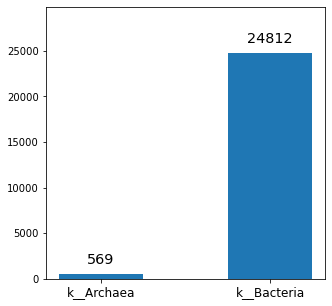

In [37]:
plt.figure(figsize=(5,5))
plt.ylim(0,np.max(k_y['Count'])+5000)
plt.bar(k_y['kingdom_n'],k_y['Count'], width = 0.5)
plt.xticks(k_y['kingdom_n'], k_label, fontproperties = 'Times New Roman', size = 12)
for i in range(len(k_y['kingdom_n'])):
    plt.annotate("%s" % round(k_y['Count'][i],2), xy=(k_y['kingdom_n'][i],k_y['Count'][i]), 
                 xytext=(k_y['kingdom_n'][i],k_y['Count'][i]+1500),ha='center',va='center',fontsize='x-large')

plt.show()

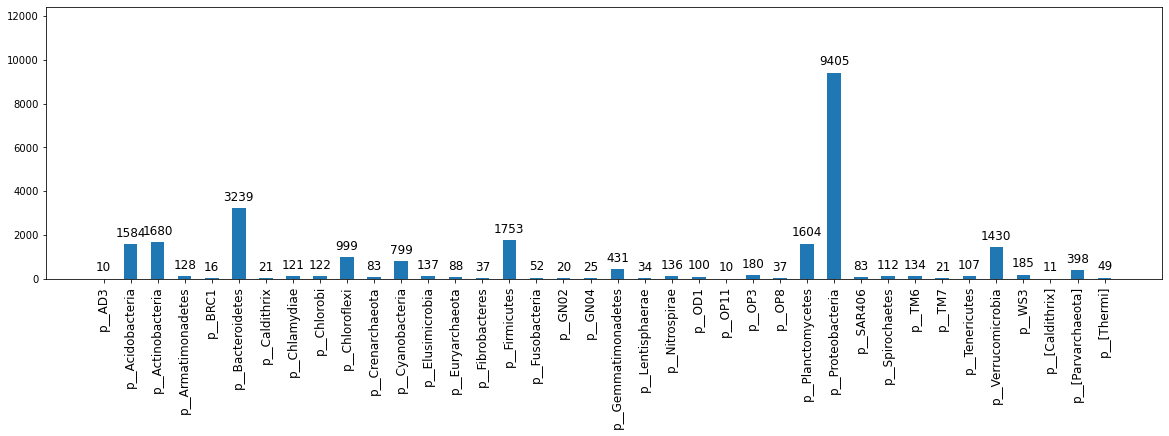

In [38]:
plt.figure(figsize=(20,5))
plt.ylim(0,np.max(p_y['Count'])+3000)
plt.bar(p_y['phylum_n'],p_y['Count'], width = 0.5)
plt.xticks(p_y['phylum_n'], p_label, fontproperties = 'Times New Roman', size = 12, rotation = 'vertical')
for i in range(len(p_y['phylum_n'])):
    plt.annotate("%s" % round(p_y['Count'][i],2), xy=(p_y['phylum_n'][i],p_y['Count'][i]), 
                 xytext=(p_y['phylum_n'][i],p_y['Count'][i]+500),ha='center',va='center',fontsize='large')

plt.show()

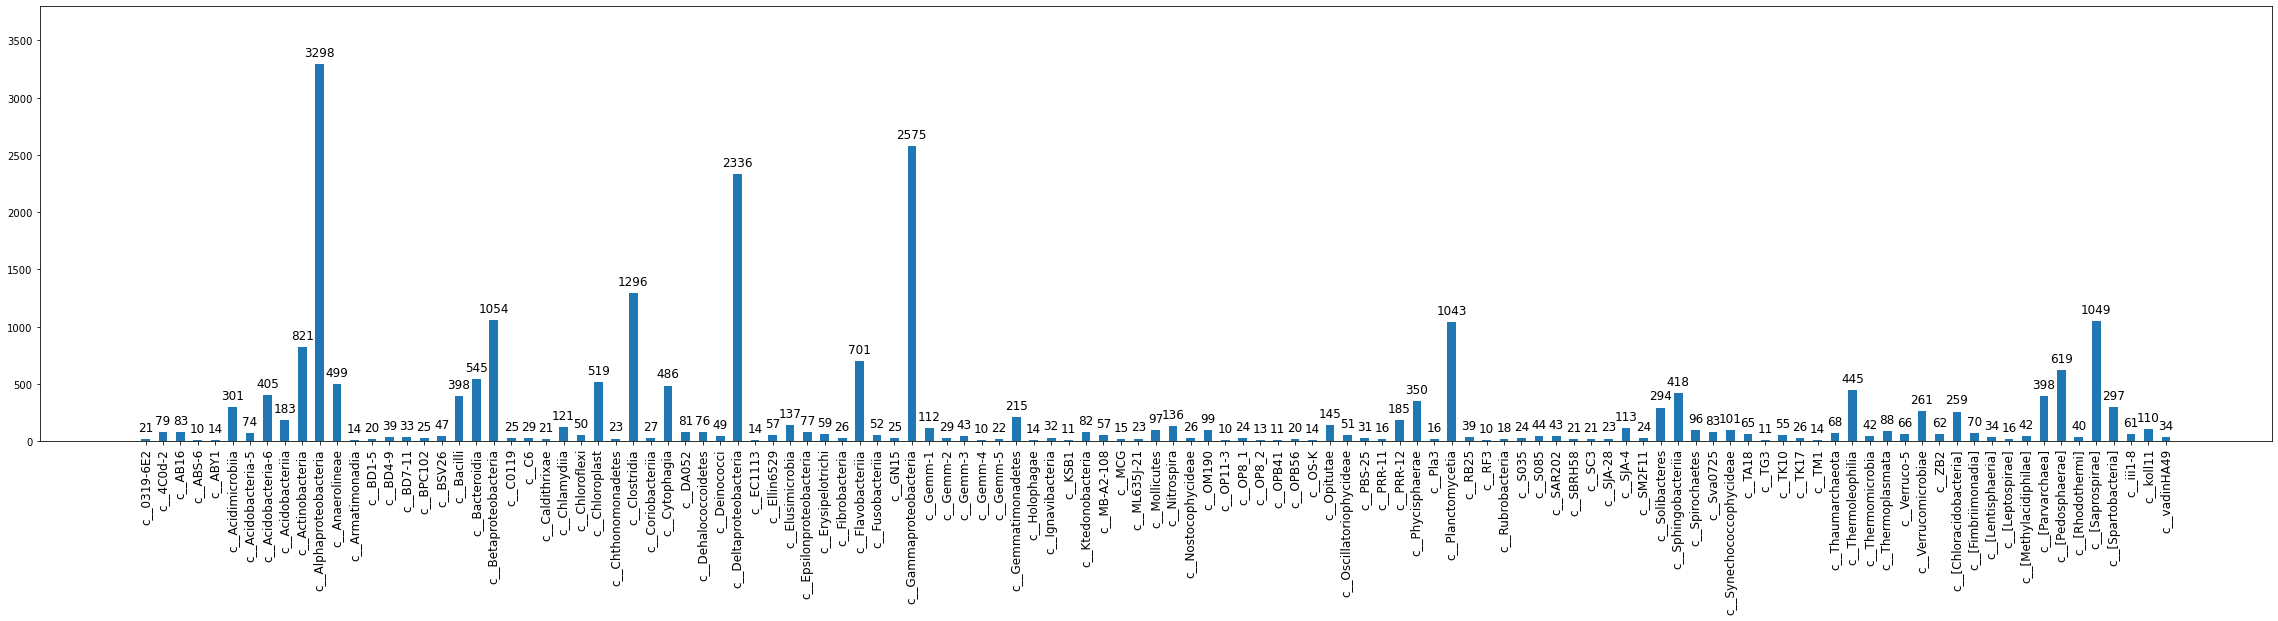

In [40]:
plt.figure(figsize=(40,8))
plt.ylim(0,np.max(c_y['Count'])+500)
plt.bar(c_y['class_n'],c_y['Count'], width = 0.5)
plt.xticks(c_y['class_n'],c_label, fontproperties = 'Times New Roman', size = 12, rotation = 'vertical')
for i in range(len(c_y['class_n'])):
    plt.annotate("%s" % round(c_y['Count'][i],2), xy=(c_y['class_n'][i],c_y['Count'][i]), 
                 xytext=(c_y['class_n'][i],c_y['Count'][i]+100),ha='center',va='center',fontsize='large')

plt.show()